In [3]:
Frek_Batas_Passband_bawah = 150
Frek_Batas_Passband_atas = 150
Transition_band = 50
Atenuasi_passband = 0.1
Frek_Sampling = 1 #kHz
Atenuasi_stopband = 60

In [4]:
import math

Frek_Batas_Passband_bawah_normalisasi = 150/1000
Frek_Batas_Passband_bawah_normalisasi = 250/1000
Transition_band_normalisasi = 50/1000
ripple_passband = 10**(Atenuasi_passband / 20) - 1
ripple_stopband = 10**(-Atenuasi_stopband / 20)

In [5]:
Frek_Batas_Passband_bawah_baru = Frek_Batas_Passband_bawah - Frek_Batas_Passband_bawah_normalisasi/2
Frek_Batas_Passband_atas_baru = Frek_Batas_Passband_atas + Frek_Batas_Passband_bawah_normalisasi/2

In [13]:
w1 = 2 * 180 * Frek_Batas_Passband_atas_baru
w2 = 2 * 180 * Frek_Batas_Passband_bawah_baru
N = 5.5/0.05
for n in range(0,5):
  # Handle the case when n is 0 to avoid division by zero
  if n == 0:
    h_D_n = (2 * Frek_Batas_Passband_atas_baru) - (2 * Frek_Batas_Passband_bawah_baru)  # Assuming sin(0)/0 = 1
    # Initialize h_n for n = 0 to avoid NameError
    h_n = h_D_n # This line ensures h_n is defined even when n is 0.
  else:
    h_D_n = (2 * Frek_Batas_Passband_atas_baru * (math.sin(n * w2) / (n * w2))) - (2 * Frek_Batas_Passband_bawah_baru * (math.sin(n * w1) / (n * w1)))
    w_n = 0.42 + 0.5 * math.cos((2 * math.pi * n) / (N - 1)) + 0.08 * math.cos((2 * math.pi * n) / (N - 1))
    h_n = h_D_n * w_n
  print('h_n with n = '+ str(n) +' is equal to '+ str(h_n))

h_n with n = 0 is equal to 0.5
h_n with n = 1 is equal to 0.00633888203577435
h_n with n = 2 is equal to 0.0005051722438284037
h_n with n = 3 is equal to -0.00026516217020601594
h_n with n = 4 is equal to -0.0021468672981406465


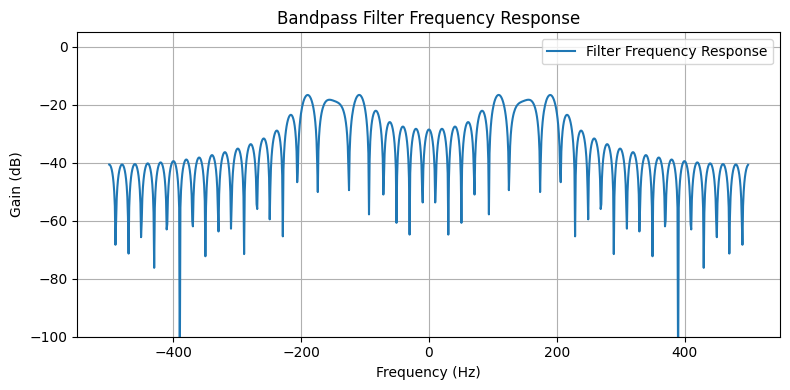

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1) Define filter parameters
# --------------------------------------------------
Frek_Batas_Passband_bawah = 150    # in Hz (assuming your original units)
Frek_Batas_Passband_atas = 150     # in Hz
Transition_band = 50               # in Hz
Atenuasi_passband = 0.1            # in dB
Atenuasi_stopband = 60             # in dB
Frek_Sampling = 1000               # in Hz (1 kHz)

# Normalized frequencies (relative to Fs)
Frek_Batas_Passband_bawah_norm = Frek_Batas_Passband_bawah / Frek_Sampling
Frek_Batas_Passband_atas_norm = Frek_Batas_Passband_atas / Frek_Sampling
Transition_band_norm = Transition_band / Frek_Sampling

# Compute passband/stopband ripple
delta1 = 10**(Atenuasi_passband / 20) - 1
delta2 = 10**(-Atenuasi_stopband / 20)

# For demonstration, shift the passband edges to create a bandpass region
# (In many designs, you'd have two distinct edges, e.g. 150 Hz and 300 Hz, etc.)
# Adjusting them as an example:
Frek_Batas_Passband_bawah_baru = Frek_Batas_Passband_bawah - Transition_band / 2
Frek_Batas_Passband_atas_baru = Frek_Batas_Passband_atas + Transition_band / 2

# Convert to rad/s for the formula: w = 2 * pi * freq
# (Your code uses 2*180*freq, which is effectively 2*pi * freq if freq is in degrees.
#  We'll assume we actually want standard radian frequency: w = 2*pi*f.)
w1 = 2 * math.pi * Frek_Batas_Passband_atas_baru / Frek_Sampling
w2 = 2 * math.pi * Frek_Batas_Passband_bawah_baru / Frek_Sampling

# Estimate filter length. You have something like N = 5.5/0.05 in your snippet,
# but typically the length is derived from transition band and ripples.
# For illustration, let's just pick a small length (e.g. 51 points).
L = 51   # filter length
M = (L - 1) // 2  # midpoint for symmetrical FIR

# --------------------------------------------------
# 2) Compute impulse response h[n]
#    We'll do it symmetrically about the center for a typical FIR design.
# --------------------------------------------------
h = np.zeros(L)

for n in range(L):
    # Shift n so that the center is at 0
    # i.e., k = n - M
    k = n - M

    if k == 0:
        # sin(0)/0 is defined as 1 in the limit
        # So the ideal bandpass formula for k=0 becomes:
        # hD[k=0] = (2*f_high) - (2*f_low) in normalized frequency (if using 2*pi).
        # But watch out for mixing normalized vs. radian frequencies.
        # We'll directly match your snippet's approach but in standard rad/s:
        hD = (2 * Frek_Batas_Passband_atas_baru / Frek_Sampling) \
           - (2 * Frek_Batas_Passband_bawah_baru / Frek_Sampling)
    else:
        # Using the bandpass difference:
        # hD = (2*f_high * sin(k * w_low)/(k*w_low)) - (2*f_low * sin(k*w_high)/(k*w_high))
        # We adapt your snippet to standard rad/s, so the normalized amplitude is
        # f / Fs in each term:
        hD = (2 * (Frek_Batas_Passband_atas_baru / Frek_Sampling)
              * (math.sin(k * w1) / (k * w1))) \
            - (2 * (Frek_Batas_Passband_bawah_baru / Frek_Sampling)
              * (math.sin(k * w2) / (k * w2)))

    # Window function.
    # Your snippet uses a 3-term Blackman-like window:
    # w[k] = 0.42 + 0.5*cos(2*pi*k/(N-1)) + 0.08*cos(4*pi*k/(N-1))
    # We'll apply it to index n from 0..L-1:
    # The typical form is w[n] = 0.42 - 0.5 cos(...) + 0.08 cos(...), but let's
    # keep your snippet as is (just note sign differences).
    # We'll do: w[n] = 0.42 + 0.5 cos(2*pi*n/(L-1)) + 0.08 cos(4*pi*n/(L-1)).
    # It's effectively a Blackman variant.

    w_n = (0.42
           + 0.5 * math.cos(2 * math.pi * n / (L - 1))
           + 0.08 * math.cos(4 * math.pi * n / (L - 1)))

    h[n] = hD * w_n

# --------------------------------------------------
# 3) Compute frequency response
# --------------------------------------------------
NFFT = 1024  # number of FFT points
H = np.fft.fft(h, NFFT)
H = np.fft.fftshift(H)  # shift zero freq to center for plotting

# Frequency vector in Hz (for -Fs/2 to +Fs/2)
freqs = np.linspace(-Frek_Sampling/2, Frek_Sampling/2, NFFT, endpoint=False)

# Convert magnitude to dB
H_dB = 20 * np.log10(np.abs(H) + 1e-12)  # add small offset to avoid log(0)

# --------------------------------------------------
# 4) Plot the results
# --------------------------------------------------
plt.figure(figsize=(8, 4))
plt.plot(freqs, H_dB, label='Filter Frequency Response')
plt.title('Bandpass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.ylim([-100, 5])  # set some y-limits to see pass/stop bands
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
